# **Jacob Shearer - Excercise set 6**

In [268]:
import numpy as np
import scipy as sp
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib.animation as animation

**Question 1:**

Part (a):

In [365]:
def numerov(depth, radius, energy_range, tolerance):
    h = 0.01
    left_x = np.array([])
    i = 0
    xl = -2*radius
    left_index = 0
    while xl < 2*radius:
        xl = (-2*radius)+ i*h
        if xl == float(radius):
            left_index = i
        
        left_x = np.append(left_x, xl)
        i += 1
    
    right_x = np.arange(2*radius, -2*radius-h, -h)
    left_y = np.array([])
    i = 0
    xr = 2*radius
    right_index = 0
    while xr > -2*radius:
        xr = (2*radius) - i*h
        if xr == float(radius):
            right_index = i
        
        right_x = np.append(right_x, xr)
        i += 1
    
    left_wf = np.zeros(len(left_x))
    left_wf[0] = 0
    left_wf[1] = 0.00001
    
    right_wf = np.zeros(len(right_x))
    right_wf[0] = 0
    right_wf[1] = 0.00001
    
    position = left_x
    wavefunction = np.array([])
    k_squared = np.array([])
    
    e_min = energy_range[0]
    e_max = energy_range[1]
    delta_e = 0.01
    e = e_min
    
    max_trials = 100
    trial_step = 0
    
    
    def V(x):
        if np.abs(x) <= radius:
            v = depth
        else:
            v = 0
        
        return v
    
    
    def set_k_squared(x, e):
        k_sq = np.array([])
        two_m_over_hbar_sq = 1  #0.0483
        for x_val in x:
            k_sq = np.append(k_sq, two_m_over_hbar_sq*e-V(x_val))
        
        return k_sq
    
    
    def numerov_alg(wf, k2):
        b = (h**2)/12
        for i in range(len(wf)-1):
            if i == 0 or i == 1:
                continue
            else: 
                wf[i+1] = (2*wf[i]*(1-5*b*k2[i])-(1+b*k2[i-1])*wf[i-1])/(1+b*k2[i+1])
    
    
    while trial_step <= max_trials:
        left_k_sq = set_k_squared(left_x, e)
        right_k_sq = set_k_squared(right_x, e)
        numerov_alg(left_wf, left_k_sq)
        numerov_alg(right_wf, right_k_sq)
        
        left = np.gradient(left_wf)[left_index]/left_wf[left_index]
        right = np.gradient(right_wf)[right_index]/right_wf[right_index]
        delta_e = (left-right)/(left+right)
        if abs(delta_e) < tolerance:
            wavefunction = np.append(left_wf[0:left_index], right_wf[right_index::-1])
            k_squared = left_k_sq
            break
        else:
            if delta_e < 0:
                e_max = e
            else:
                e_min = e
            
            e = (e_min+e_max)/2
            trial_step += 1

    return wavefunction, position, k_squared, e
            

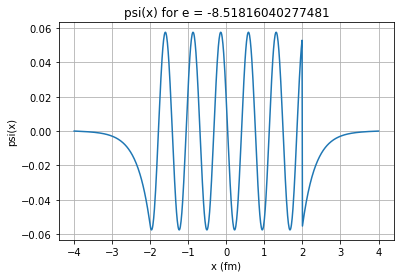

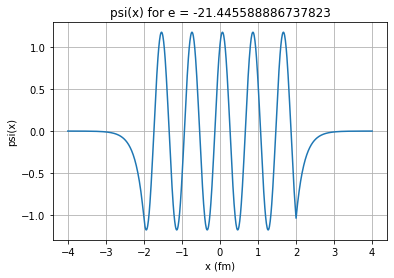

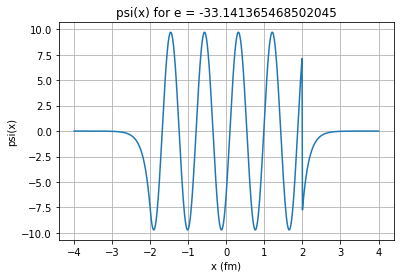

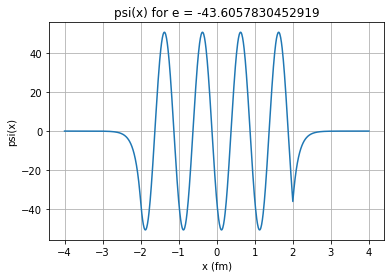

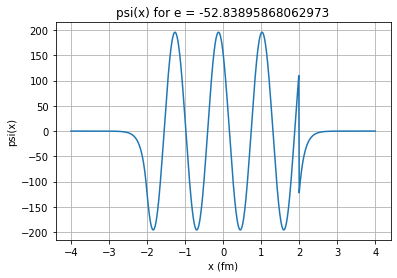

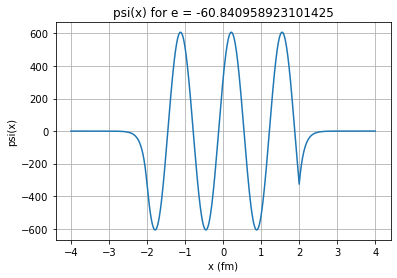

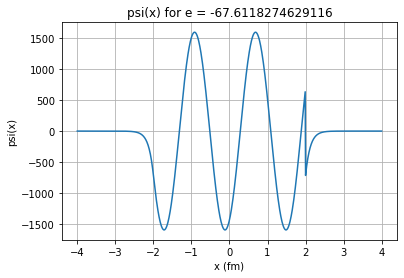

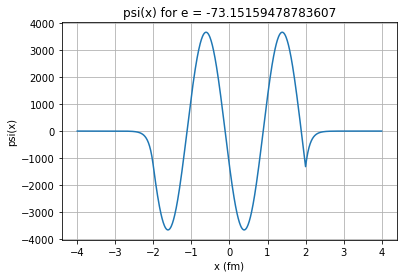

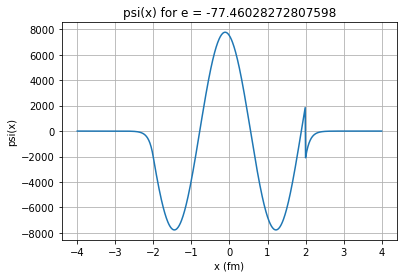

Allowed Energies:
-8.51816040277481 MeV
-21.445588886737823 MeV
-33.141365468502045 MeV
-43.6057830452919 MeV
-52.83895868062973 MeV
-60.840958923101425 MeV
-67.6118274629116 MeV
-73.15159478783607 MeV
-77.46028272807598 MeV


In [367]:
%matplotlib inline
depth = 83
radius = 2
tolerance = 1e-8
wavefunctions = []
energies = []
k_squareds = []
position = np.array([])
for i in range(depth):
    wavefunction, position, k_squared, e = numerov(-depth, radius, (-i-1, -i), tolerance)
    if len(wavefunction) > 0:
        wavefunctions.append(wavefunction)
        energies.append(e)
        k_squareds.append(k_squared)
        plt.plot(position, wavefunction)
        plt.xlabel('x (fm)')
        plt.ylabel('psi(x)')
        plt.title(f'psi(x) for e = {e}')
        plt.grid(True)
        plt.show()

print('Allowed Energies:')
for energy in energies:
    print(f'{energy} MeV')

Part (b):

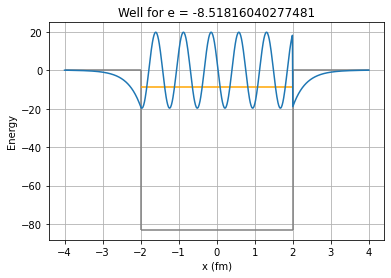

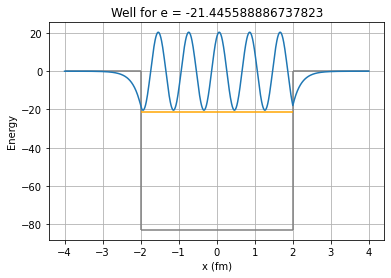

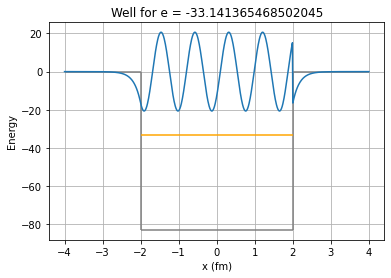

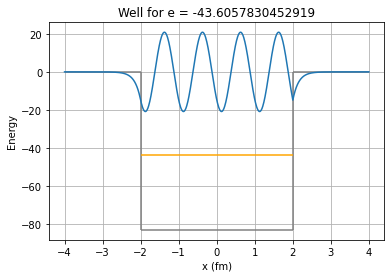

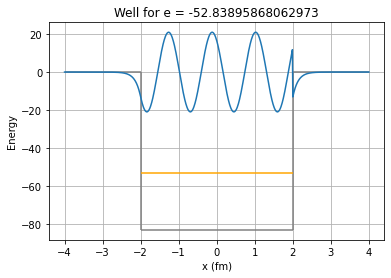

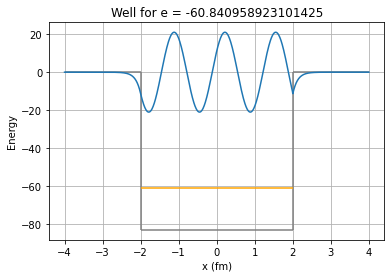

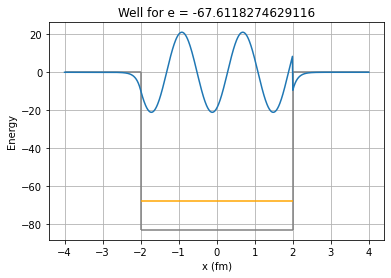

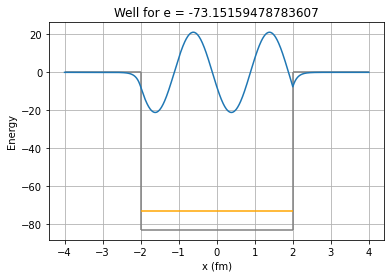

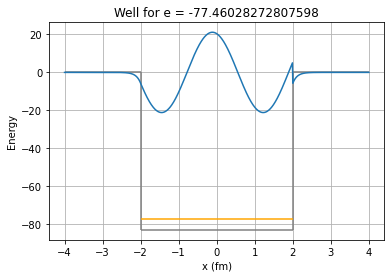

In [368]:
for i in range(len(wavefunctions)):
    wavefunction = wavefunctions[i]
    e = energies[i]
    norm = 1/np.sqrt(np.sum(np.abs(wavefunction)**2))
    wavefunction = norm*wavefunction*300
    plt.plot(position, wavefunction)
    plt.vlines([-radius, radius], -depth, 0, colors=('gray'))
    plt.hlines([-83, e, 0, 0], (-radius, -radius, -4, 2), (radius, radius, -2, 4), 
               colors=('gray', 'orange', 'gray', 'gray'))
    plt.grid(True)
    plt.title(f'Well for e = {e}')
    plt.xlabel('x (fm)')
    plt.ylabel('Energy')
    plt.show()

Part (c):

In [257]:
for radius in [4, 2, 1, 0.5]:
    depth = 83
    tolerance = 1e-8
    wavefunctions = []
    energies = []
    k_squareds = []
    position = np.array([])
    for i in range(depth):
        wavefunction, position, k_squared, e = numerov(-depth, radius, (-i-1, -i), tolerance)
        if len(wavefunction) > 0:
            wavefunctions.append(wavefunction)
            energies.append(e)
            k_squareds.append(k_squared)
    
    print(f'For radius = {radius}:')
    print('Energies:')
    print(energies)
    print('\n')

Part (c):
For radius = 4:
Energies:
[-1.5069072842597961, -8.439705550670624, -15.064123541116714, -21.38033577799797, -27.38838478922844, -33.08829069137573, -38.48006546497345, -43.56371721625328, -48.33925184607506, -52.80667382478714, -56.96598681807518, -60.81719373166561, -64.36029699444771, -67.5952986329794, -70.52220039069653]


For radius = 2:
Energies:
[-8.51816040277481, -21.445588886737823, -33.141365468502045, -43.6057830452919, -52.83895868062973, -60.840958923101425, -67.6118274629116, -73.15159478783607, -77.46028272807598]


For radius = 1:
Energies:
[-21.26113986968994, -43.4863201379776, -60.77327036857605, -73.12137219309807, -80.53033152967691]


For radius = 0.5:
Energies:
[-43.45127463340759, -73.11235451698303]




The energies appear to blah blah blah

**Question 2:**

Part (a):

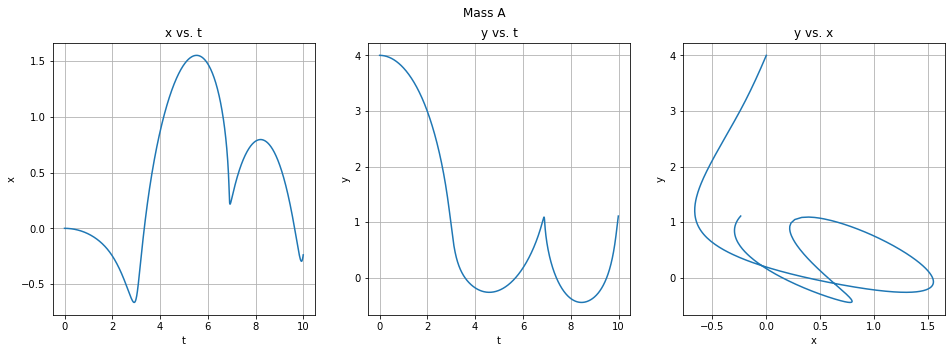

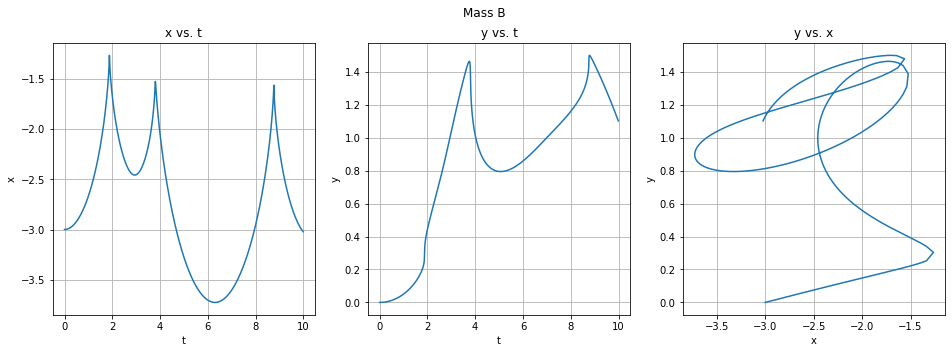

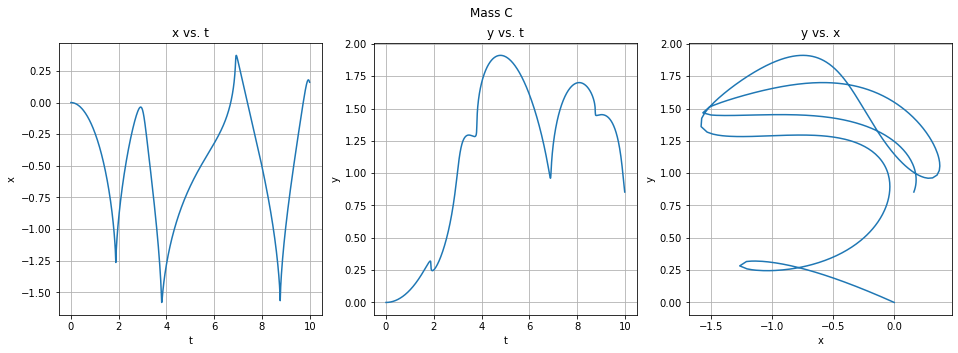

In [375]:
G = 1
ma = 3
mb = 4
mc = 5


def derivs(state, t):
    out = [0,0,0,0,0,0,0,0,0,0,0,0]
    
    
    def x_grav_sum(x_i, y_i, m_i, x_list, y_list, m_list):
        g_sum = 0
        for i in range(2):
            r = np.sqrt((x_i-x_list[i])**2 + (y_i-y_list[i])**2)
            g_sum += (-G*m_list[i]*(x_i - x_list[i]))/(r**3)
        return g_sum
    
    
    def y_grav_sum(x_i, y_i, m_i, x_list, y_list, m_list):
        g_sum = 0
        for i in range(2):
            r = np.sqrt((x_i-x_list[i])**2 + (y_i-y_list[i])**2)
            g_sum += (-G*m_list[i]*(y_i - y_list[i]))/(r**3)
        return g_sum
    
    
    xa = state[0]
    ya = state[1]
    xa_d = state[2]
    ya_d = state[3]
    
    xb = state[4]
    yb = state[5]
    xb_d = state[6]
    yb_d = state[7]
    
    xc = state[8]
    yc = state[9]
    xc_d = state[10]
    yc_d = state[11]
    
    # Mass a eqs
    out[0] = xa_d
    out[1] = ya_d
    x_list = [xb, xc]
    y_list = [yb, yc]
    m_list = [mb, mc]
    out[2] = x_grav_sum(xa, ya, ma, x_list, y_list, m_list)
    out[3] = y_grav_sum(xa, ya, ma, x_list, y_list, m_list)
    
    # Mass b eqs
    out[4] = xb_d
    out[5] = yb_d
    x_list = [xa, xc]
    y_list = [ya, yc]
    m_list = [ma, mc]
    out[6] = x_grav_sum(xb, yb, mb, x_list, y_list, m_list)
    out[7] = y_grav_sum(xb, yb, mb, x_list, y_list, m_list)
    
    # Mass c eqs
    out[8] = xc_d
    out[9] = yc_d
    x_list = [xa, xb]
    y_list = [ya, yb]
    m_list = [ma, mb]
    out[10] = x_grav_sum(xc, yc, mc, x_list, y_list, m_list)
    out[11] = y_grav_sum(xc, yc, mc, x_list, y_list, m_list)
    
    return out


dt = 0.01
t = np.arange(0, 10, dt)
# xa, ya, xa_d, ya_d, 
#xb, yb, xb_d, yb_d, 
#xc, yc, xc_d, yc_d
initial_conditions = [0, 4, 0, 0,
                      -3, 0, 0, 0,
                      0, 0, 0, 0]
mass_positions = integrate.odeint(derivs, initial_conditions, t)

# Position Plots
%matplotlib inline
index_list = [0, 4, 8]
mass_name_list = ['A', 'B', 'C']
for i in range(3):
    first_index = index_list[i]
    mass_name = mass_name_list[i]
    fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16, 5))
    ax1.plot(t, mass_positions[:, first_index])
    ax1.set_xlabel('t')
    ax1.set_ylabel('x')
    ax1.set_title('x vs. t')
    ax1.grid()
    
    ax2.plot(t, mass_positions[:, first_index+1])
    ax2.set_xlabel('t')
    ax2.set_ylabel('y')
    ax2.set_title('y vs. t')
    ax2.grid()
    
    ax3.plot(mass_positions[:, first_index], mass_positions[:, first_index+1])
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.set_title('y vs. x')
    ax3.grid()
    
    fig.suptitle(f'Mass {mass_name}')
    plt.show()

<IPython.core.display.Javascript object>


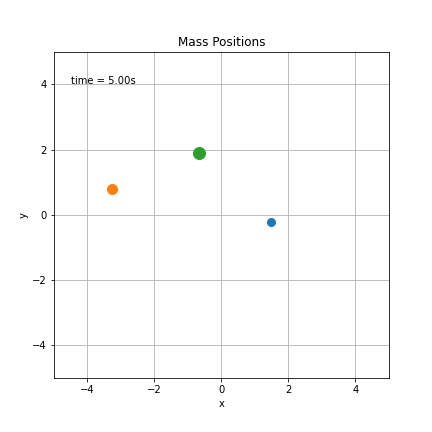

In [376]:
# Animation code
%matplotlib notebook
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-5, 5), ylim=(-5, 5))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Mass Positions')
ax.grid()

ma_marker, = ax.plot([], [], 'o-', markersize=8)
mb_marker, = ax.plot([], [], 'o-', markersize=10)
mc_marker, = ax.plot([], [], 'o-', markersize=12)
time_template = 'time = %.2fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    ma_marker.set_data([], [])
    mb_marker.set_data([], [])
    mc_marker.set_data([], [])
    time_text.set_text('')
    return ma_marker, mb_marker, mc_marker, time_text

def animate(i):
    ma_marker.set_data(mass_positions[i, 0], mass_positions[i, 1])
    mb_marker.set_data(mass_positions[i, 4], mass_positions[i, 5])
    mc_marker.set_data(mass_positions[i, 8], mass_positions[i, 9])
    time_text.set_text(time_template % (i*dt))
    return ma_marker, mb_marker, mc_marker, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)), interval=10, blit=True, init_func=init)

Part (b):

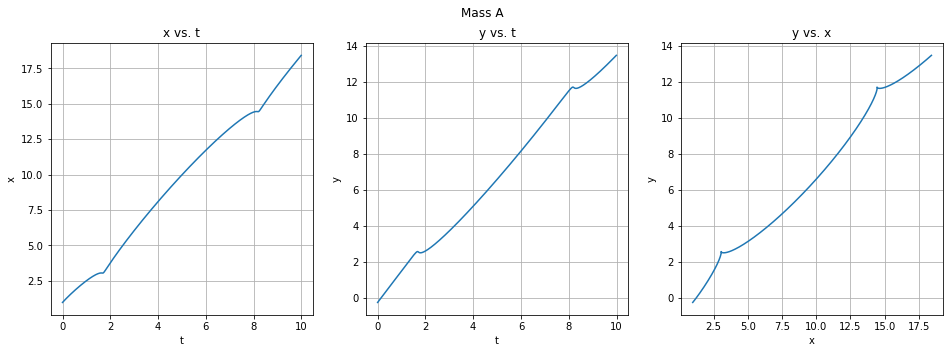

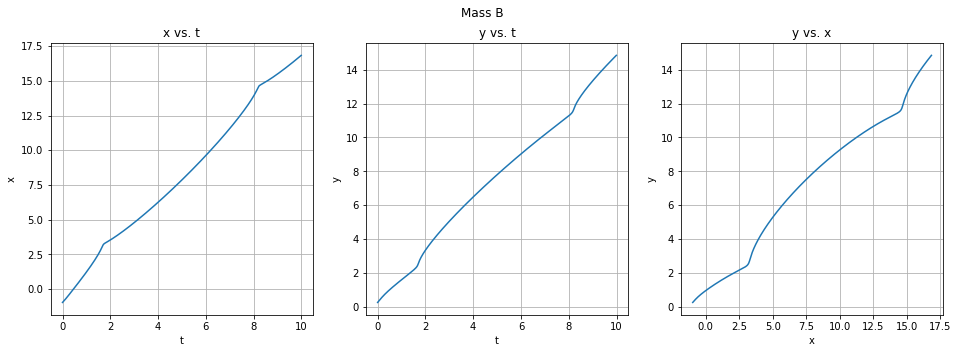

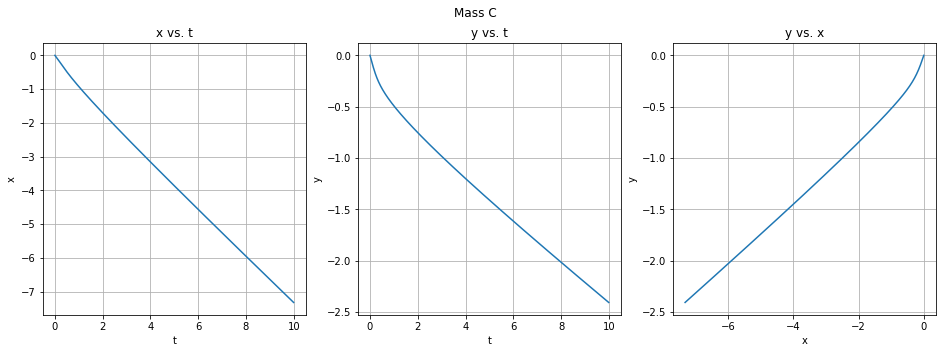

In [377]:
G = 1
ma = 1
mb = 1
mc = 1
dt = 0.01
t = np.arange(0, 10, dt)
x_pos = 0.97000436
y_pos = -0.24308753
x_v = -0.93240737
y_v = -0.86473146
# xa, ya, xa_d, ya_d,
# xb, yb, xb_d, yb_d,
# xc, yc, xc_d, yc_d
initial_conditions = [x_pos, y_pos, -2*x_v, -2*y_v, 
                      -x_pos, -y_pos, -2*x_v, -2*y_v, 
                      0, 0, x_v, y_v]
mass_positions = integrate.odeint(derivs, initial_conditions, t)

# Position Plots
%matplotlib inline
index_list = [0, 4, 8]
mass_name_list = ['A', 'B', 'C']
for i in range(3):
    first_index = index_list[i]
    mass_name = mass_name_list[i]
    fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16, 5))
    ax1.plot(t, mass_positions[:, first_index])
    ax1.set_xlabel('t')
    ax1.set_ylabel('x')
    ax1.set_title('x vs. t')
    ax1.grid()
    
    ax2.plot(t, mass_positions[:, first_index+1])
    ax2.set_xlabel('t')
    ax2.set_ylabel('y')
    ax2.set_title('y vs. t')
    ax2.grid()
    
    ax3.plot(mass_positions[:, first_index], mass_positions[:, first_index+1])
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.set_title('y vs. x')
    ax3.grid()
    
    fig.suptitle(f'Mass {mass_name}')
    plt.show()

<IPython.core.display.Javascript object>


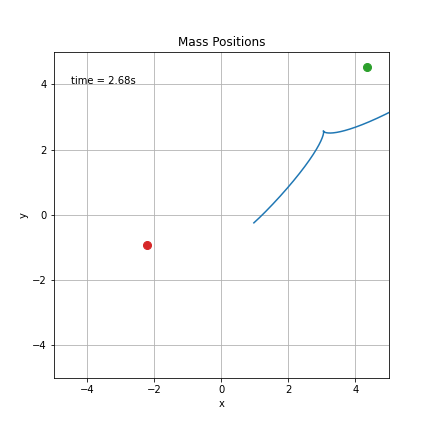

In [378]:
# Animation code
%matplotlib notebook
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-5, 5), ylim=(-5, 5))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Mass Positions')
ax.plot(mass_positions[:, 0], mass_positions[:, 1])
ax.grid()

ma_marker, = ax.plot([], [], 'o-', markersize=8)
mb_marker, = ax.plot([], [], 'o-', markersize=8)
mc_marker, = ax.plot([], [], 'o-', markersize=8)
time_template = 'time = %.2fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    ma_marker.set_data([], [])
    mb_marker.set_data([], [])
    mc_marker.set_data([], [])
    time_text.set_text('')
    return ma_marker, mb_marker, mc_marker, time_text

def animate(i):
    ma_marker.set_data(mass_positions[i, 0], mass_positions[i, 1])
    mb_marker.set_data(mass_positions[i, 4], mass_positions[i, 5])
    mc_marker.set_data(mass_positions[i, 8], mass_positions[i, 9])
    time_text.set_text(time_template % (i*dt))
    return ma_marker, mb_marker, mc_marker, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)), interval=10, blit=True, init_func=init)

Part (c):

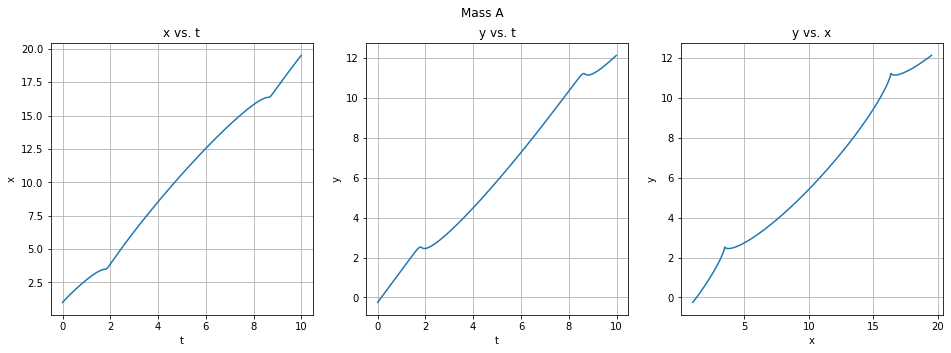

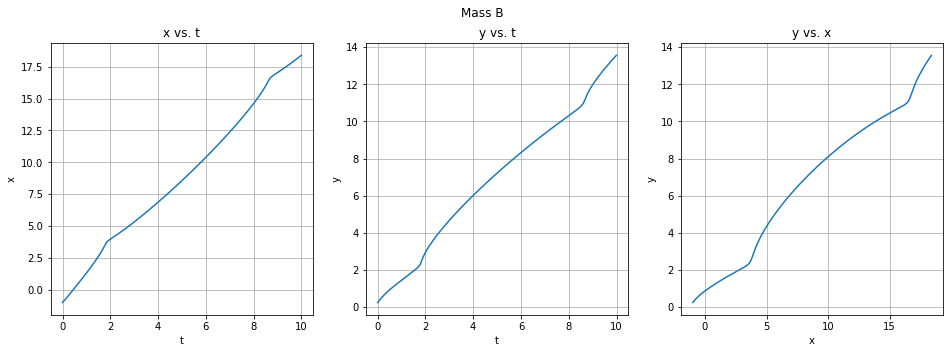

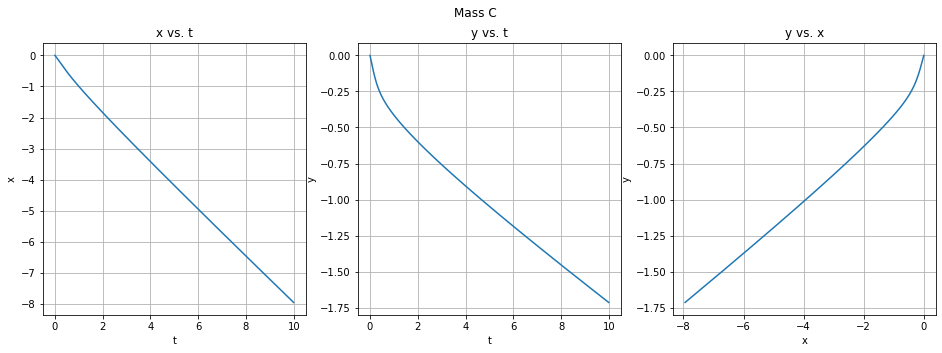

In [379]:
G = 1
ma = 1
mb = 1
mc = 1
dt = 0.01
t = np.arange(0, 10, dt)
x_pos = 1  # previously 0.97000436
y_pos = -0.25  # previously -0.24308753
x_v = -1  # previously -0.93240737
y_v = -0.8  # previously -0.86473146
# xa, ya, xa_d, ya_d,
# xb, yb, xb_d, yb_d,
# xc, yc, xc_d, yc_d
initial_conditions = [x_pos, y_pos, -2*x_v, -2*y_v, 
                      -x_pos, -y_pos, -2*x_v, -2*y_v, 
                      0, 0, x_v, y_v]
mass_positions = integrate.odeint(derivs, initial_conditions, t)

# Position Plots
%matplotlib inline
index_list = [0, 4, 8]
mass_name_list = ['A', 'B', 'C']
for i in range(3):
    first_index = index_list[i]
    mass_name = mass_name_list[i]
    fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16, 5))
    ax1.plot(t, mass_positions[:, first_index])
    ax1.set_xlabel('t')
    ax1.set_ylabel('x')
    ax1.set_title('x vs. t')
    ax1.grid()
    
    ax2.plot(t, mass_positions[:, first_index+1])
    ax2.set_xlabel('t')
    ax2.set_ylabel('y')
    ax2.set_title('y vs. t')
    ax2.grid()
    
    ax3.plot(mass_positions[:, first_index], mass_positions[:, first_index+1])
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.set_title('y vs. x')
    ax3.grid()
    
    fig.suptitle(f'Mass {mass_name}')
    plt.show()

<IPython.core.display.Javascript object>


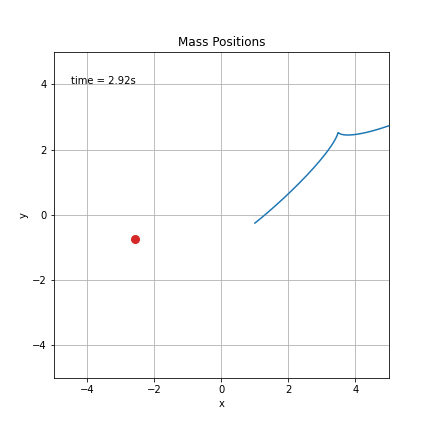

In [380]:
# Animation code
%matplotlib notebook
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-5, 5), ylim=(-5, 5))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Mass Positions')
ax.plot(mass_positions[:, 0], mass_positions[:, 1])
ax.grid()

ma_marker, = ax.plot([], [], 'o-', markersize=8)
mb_marker, = ax.plot([], [], 'o-', markersize=8)
mc_marker, = ax.plot([], [], 'o-', markersize=8)
time_template = 'time = %.2fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    ma_marker.set_data([], [])
    mb_marker.set_data([], [])
    mc_marker.set_data([], [])
    time_text.set_text('')
    return ma_marker, mb_marker, mc_marker, time_text

def animate(i):
    ma_marker.set_data(mass_positions[i, 0], mass_positions[i, 1])
    mb_marker.set_data(mass_positions[i, 4], mass_positions[i, 5])
    mc_marker.set_data(mass_positions[i, 8], mass_positions[i, 9])
    time_text.set_text(time_template % (i*dt))
    return ma_marker, mb_marker, mc_marker, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)), interval=10, blit=True, init_func=init)

As the above plots show, even with a slightly different set of initial conditions we still see a figure 8. Therefore, this orbit is stable.

**Question 3:**